The algorithm decomposes permutation to the product of the cycles. After that, it works with each cycle (a_1 a_2 ... a_n) in following way:
1) We compute the permutation corresponding to the cycle
2) We initialize the special variable x
3) It has a_1 on the a_n-th place and we make the sequence of elementary transpositions which moves a_1 from a_n-th place to a_1-th place, we increase or decrease x by 1 during every elementary transposition that we will make, the sign of change depends on the direction of change of elementary transposition. So, basically x equals the number of current position of transposition, but if our transposition is (1N) change of x is also +-1, however the position changes from 1 to N or from N to 1.
4) After that, we try to restore position of a_2 and we compute the sequence of elementary transpositions which moves a_2 to a_2-th place once again, we are doing the same actions with x e t.c.
5) We repeat these actions for every element of the cycle
6) In some situations the elementary transposition should be changed by L or R (it depents on the direction in which we are moving the current element). This change should be done if and only if for the variable x x - c == +- (N-1)


The algorithm sums all cycle decompositions and simplifies it in decompose_permutation function. Also, in this code we make some shifts L or R in the start of algorithm (we find an optimal number of shifts) and run decompose_permutation only after that.

In [1]:
import random

def decompose_cycle(cycle, N): #This function decomposes cycle in S_N to the sequence of L,R,X
  n = len(cycle)
  x = -10**12 
  last_ind = -1
  arr = []
  total = [] #Array with visited positions during all time of algorithm working
  for i in range(N):
    arr.append([(_ + i) % N + 1 for _ in range(N)])  #The permutations L^n or R^n
  perm = [i + 1 for i in range(N)]  #There is a current state of permutation on each step in this variable
  for i in range(n):
    if i == n - 1:
      perm[cycle[i] - 1] = cycle[0]
    else:
      perm[cycle[i] - 1] = cycle[i + 1]
  ans = ""   #In this variable we keep total sequence of L,X,R which is the cycle decomposition
  l = []        #Array with visited positions during the current step
  c = 0      #Here we will keep the position where we start (CAN BE NOT 0)
  for i in range(n):
    l = []                           
    ind1 = perm.index(cycle[i])
    ind2 = cycle[i] - 1                      #on each step we are moving from ind1 to ind2
    dir = "L."
    if ind1 == ind2:                       #if ind1 == ind2 we should not do any actions
      continue
    if abs(ind1 - ind2) <= N / 2: #After that we have a huge number of cases in which optimal permutations could be different
      if ind1 < ind2:
        dir = "R."
        i1 = ind2 - 1
        while i1 >= ind1:
          l.append(i1)
          total.append(i1)
          i1 -= 1
      else:
        dir = "L."
        i1 = ind2
        while i1 <= ind1 - 1:
          l.append(i1)
          total.append(i1)
          i1 += 1
    else:
      if ind1 > ind2:
        dir = "R."
        i1 = ind2 - 1
        while i1 >= ind1 or i1 <= ind2 - 1:
          if i1 < 0:
            i1 = N - 1
          if not (i1 >= ind1 or i1 <= ind2 - 1):
            break
          l.append(i1)
          total.append(i1)
          i1 -= 1
      else:
        dir = "L."
        i1 = ind2
        while i1 >= ind2 or i1 <= ind1 - 1:
          if i1 >= N:
            i1 = 0
          if not (i1 >= ind2 or i1 <= ind1 - 1):
            break
          l.append(i1)
          total.append(i1)
          i1 += 1
    answer = ""     #Here we keep the sequence of L,X,R corresponding to the current step
    if i == 0:
      c = l[-1]     #Initialization of starting position which is important further
    if i != n - 1:
      for ind in range(len(l)):
        j = l[::-1][ind]
        if x != -10 ** 12 and x < -N + c:
          x += N
        elif x != -10**12  and x > N + c:
          x -= N
        if abs(x) >= 10**11:
          x = j
        else:
          if j == 0 and last_ind == N - 1:
            x += 1
          else:
            if j == N - 1 and last_ind == 0:
              x -= 1
            else:
              if j - last_ind < -N/2:
                x += N - (last_ind - j)
              else:
                if j - last_ind > N/2:
                  x -= N + (last_ind - j)
                else:
                  x += (j - last_ind)
        if j < N / 2:
          if x - c == N - 1:
            answer = dir + answer
            x = j
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
              x = j
            else:
              answer = "R." * j + "X." + "L." * j + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        else:
          if x - c == N - 1:
            answer = dir + answer
            x = j
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              x = j
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
            else:
              answer = "L." * (N - j) + "X." + "R." * (N - j) + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        last_ind = j
      ans = answer + ans
    else:
      for ind in range(len(l)):
        j = l[::-1][ind]
        if x == -10 ** 12:
          x = j
        else:
          if j == 0 and last_ind == N - 1:
            x += 1
          else:
            if j == N - 1 and last_ind == 0:
              x -= 1
            else:
              if j - last_ind < -N/2:
                x += N + (last_ind - j)
              else:
                if j - last_ind > N/2:
                  x -= N + (last_ind - j)
                else:
                  x += (j - last_ind)
        if j < N / 2:
          if x - c == N - 1:
            answer = dir + answer
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
            x = j
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
              x = j
            else:
              answer = "R." * j + "X." + "L." * j + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        else:
          if x - c == N - 1:
            answer = dir + answer
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
            x = j
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
              x = j
            else:
              answer = "L." * (N - j) + "X." + "R." * (N - j) + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        last_ind = j
      if perm in arr:
        if perm[0] - 1 < N / 2:
          return "R." * (perm[0] - 1) + answer + ans
        return "L." * (N - (perm[0] - 1)) + answer + ans
      if l[0] < N / 2:
        answer = "R." * l[0] + "X." + "L." * l[0] + answer
      else:
        answer = "L." * (N - l[0]) + "X." + "R." * (N - l[0]) + answer
      perm[l[0]], perm[(l[0] + 1) % N] = perm[(l[0] + 1) % N], perm[l[0]]
      ans = answer + ans      # We add the computed realization of the transposition to ans
    #print(perm)
  #print(perm)
  return ans


def expand_to_cycles(permutation): #This function decomposes permutation to product of cycles
  n = len(permutation)
  used = set()
  cur_cycle = []
  cycles = []
  i = 1
  while len(used) < n:
    while i not in used:
      used.add(i)
      cur_cycle.append(i)
      i = permutation[i - 1]
    if cur_cycle:
      cycles.append(cur_cycle)
    cur_cycle = []
    i += 1
  return cycles


def decompose_permutation(perm): #This function uses last two functions and decomposes permutation to L,X,R
  N = len(perm)
  if perm == [i for i in range(1, N + 1)]:
    return ""
  cycles = expand_to_cycles(perm)
  #print(*cycles)
  ans = ""
  cnt = -1
  for cycle in cycles:
    if len(cycle) > 1:
      ans += decompose_cycle(cycle, N)
  a1 = ans.split("X.")   #This block of code simplifies ans, 
  s = ""                 #it deletes subsequnces types of "L.L.L.R.R.", "X.X." e t.c.
  cnt = 0
  for i in range(len(a1)):
    elem = a1[i]
    if elem == "":
      if i == 0:
        s += "X."
        continue
      if i == len(a1) - 1:
        continue
      if cnt % 2 == 0:
        s = s[:-2]
      else:
        s += "X."
      cnt += 1
    else:
      cnt = 0
      c = elem.count("L") - elem.count("R")
      if c >= N / 2:
        c -= N
      elif c <= -N / 2:
        c += N
      if c >= 0:
        if i != len(a1) - 1:
          s += "L." * c + "X."
        else:
          s += "L." * c
      else:
        if i != len(a1) - 1:
          s += "R." * (-c) + "X."
        else:
          s += "R." * (-c)
  return s


def perform_action(state, action): #This function is used for testing, it makes a given action on the permutation
    temp_arr = state.copy()
    if action == 'L':
        temp_arr = [temp_arr[-1]] + temp_arr[:-1]
    elif action == 'R':
        temp_arr = temp_arr[1:] + [temp_arr[0]]
    elif action == 'X':
      temp_arr[0], temp_arr[1] = temp_arr[1], temp_arr[0]


    return temp_arr


def perform_action_inverse(state, action): #This function is not used here, but could be potentially used
  temp_arr = state.copy()                  #for the operations with inversed permutations
  if action == 'L':
    temp_arr = temp_arr[1:] + [temp_arr[0]]
  elif action == 'R':
    temp_arr = [temp_arr[-1]] + temp_arr[:-1]
  elif action == 'X':
    temp_arr[0], temp_arr[1] = temp_arr[1], temp_arr[0]

  return temp_arr

def get_n_long_permutations(n): #This is function from Fedor Petrov's code which gives hard long permutations of length n
  list_long_permutations = []
  k = int(n / 2)
  if n == 2 * k + 1:  # For odd "n"
    list_long_permutations = []
    for element_index in range(n):  # numeration of long permutations by the pair of elements
      # The symmetry for axis orthogonal to diagonal passing through the middle of element_index,element_index+1 edge of n-gon
      p1 = [_ for _ in range(n)]
      # p[element_index],p[element_index+1] = p[element_index+1],p[element_index] #
      for i in range(k):
        p1[element_index - i], p1[(element_index + 1 + i) % n] = p1[(element_index + 1 + i) % n], p1[element_index - i]
      list_long_permutations.append([elem + 1 for elem in p1])
  else:
    # First generete permutations corresponding to symmetries NOT passing by edges of n-gon - only orthogoanl to "edges"
    # E.g. n=4, k = 2
    # (0,1)(2,3) and (0,3)(1,2)
    for element_index in range(int(n / 2)):
      # The symmetry for axis orthogonal to diagonal passing through the middle of element_index,element_index+1 edge of n-gon
      p1 = [_ for _ in range(n)]
      # p[element_index],p[element_index+1] = p[element_index+1],p[element_index] #
      for j in range(k):
        p1[element_index - j], p1[(element_index + 1 + j) % n] = p1[(element_index + 1 + j) % n], p1[element_index - j]
      list_long_permutations.append([elem + 1 for elem in p1])
    # Second generate those which correspond to diagonal passing through the nodes (element_index)
    for element_index in range(int(n / 2)):
      p1 = [_ for _ in range(n)]
      # p[element_index],p[element_index+1] = p[element_index+1],p[element_index] #
      for j in range(1, k + 1):
        p1[element_index - j], p1[(element_index + j) % n] = p1[(element_index + j) % n], p1[element_index - j]
      list_long_permutations.append([elem + 1 for elem in p1])
  return list_long_permutations


N = 25
#arr = [_ for _ in range(1, N+1)]
a1 = get_n_long_permutations(N)
f = True
cnt = 0
sum = 0
scores = []
max1 = []
a = []
for arr in a1:          #Here we're solving all "long permutations" of length N
  cnt += 1
  #random.shuffle(arr)
  #print(*arr)
  N = len(arr)
  p = arr.copy()
  min1 = len(decompose_permutation(p).split('.')) - 1
  min_ind = 0
  for i in range(1, N):    #In this block of code we try to make some shifts in the start
    if i < N / 2:          #which can shorten the length of our solution
      a = p[-i:] + p[:-i]
    else:
      a = p[(N-i):] + p[:N-i]
    moves_m = (decompose_permutation(a)).split('.')
    if len(moves_m) - 1 + min(i, N - i) < min1:
      min_ind = i
      min1 = len(moves_m) - 1 + min(i, N - i)
  p = p[-min_ind:] + p[:-min_ind]
  ans = decompose_permutation(p)
  moves_m = ans.split('.')
  if len(moves_m) and moves_m[-1] == "":
    moves_m = moves_m[:-1]
  if min_ind >= N / 2:
    moves_m = moves_m + ['L'] * (N - min_ind)
    ans += 'L.' * (N - min_ind)
  else:
    moves_m = moves_m + ['R'] * min_ind
    ans += 'R.' * min_ind
  a1 = ans.split("X.")
  s1 = ""
  cnt = 0
  for i in range(len(a1)):           #This block of code is the same to one in decompose_permutation()
    elem = a1[i]                     #simplifying of the permutation
    if elem == "":
      if i == 0:
        s1 += "X."
        continue
      if i == len(a1) - 1:
        continue
      if cnt % 2 == 0:
        s1 = s1[:-2]
      else:
        s1 += "X."
      cnt += 1
    else:
      cnt = 0
      c = elem.count("L") - elem.count("R")
      if c >= N / 2:
        c -= N
      elif c <= -N / 2:
        c += N
      if c >= 0:
        if i != len(a1) - 1:
          s1 += "L." * c + "X."
        else:
          s1 += "L." * c
      else:
        if i != len(a1) - 1:
          s1 += "R." * (-c) + "X."
        else:
          s1 += "R." * (-c)
  ans = s1
  #N = 12
  #a1, a2 = 7,10
  #s1 = "L." * (a2 - 1) + "X.L." * (a1+(N-a2) - 1) + "X." + "R.X." * (a1+(N-a2) - 1) + "R." * (a2 - 1)
  #moves_m = s1.split('.')[::-1]
  p = arr.copy()
  s = [i for i in range(1, N+1)]
  for action in moves_m:
    s = perform_action(s, action)
  print(p==s, len(moves_m) - 1)            #Test of correctness of solution
  if len(moves_m) - 1 - 0.5 * N**2 > 0:#estimate of algorithm complexity is <= 0.5*N**2 + 2.5N
    f = False                          #but we show that on these permutations it's <= 0.5*N**2
    break
  print(len(moves_m) - 0.5 * N**2)
  scores.append(len(moves_m) - 1)
  print(','.join([str(elem - 1) for elem in arr]), ans[::-1][1:])
  f = (p==s)
print("The program finishes correctly", f)
#for n in range(100):
#  print(n, len(decompose_permutation([n-i for i in range(n)])))
#L.L.X.R.X.L.X.R.R. R.R.X.R.X.L.X.L.L.

True 299
-12.5
1,0,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2 R.R.R.R.R.R.R.R.R.R.R.R.X.R.X.L.X.L.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.R.X.R.X.L.X
True 301
-10.5
3,2,1,0,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4 R.R.R.R.R.R.R.R.R.R.R.X.R.X.L.X.L.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.

Let's check the length of solutions that our algorithm gives for the "longest permutations" as we suppose (supposed diameter is N(N-1)/2) and let's build the plot of the difference of length of actual solution and N(N-1)/2:

25
True 299
-12.5
1,0,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2 R.R.R.R.R.R.R.R.R.R.R.R.X.R.X.L.X.L.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.R.X.R.X.L.X
0.0 25 diff
25
True 301
-10.5
3,2,1,0,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4 R.R.R.R.R.R.R.R.R.R.R.X.R.X.L.X.L.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.L.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.R.X.L.X.L.X.L.X.L.X.L.

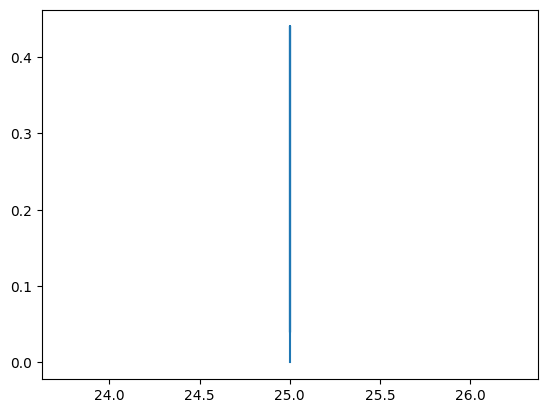

The program finishes correctly True


In [2]:
import random
import matplotlib.pyplot as plt


def decompose_cycle(cycle, N): #This function decomposes cycle in S_N to the sequence of L,R,X
  n = len(cycle)
  x = -10**12
  last_ind = -1
  arr = []
  total = [] #Array with visited positions during all time of algorithm working
  for i in range(N):
    arr.append([(_ + i) % N + 1 for _ in range(N)])  #The permutations L^n or R^n
  perm = [i + 1 for i in range(N)]  #There is a current state of permutation on each step in this variable
  for i in range(n):
    if i == n - 1:
      perm[cycle[i] - 1] = cycle[0]
    else:
      perm[cycle[i] - 1] = cycle[i + 1]
  ans = ""   #In this variable we keep total sequence of L,X,R which is the cycle decomposition
  l = []        #Array with visited positions during the current step
  c = 0      #Here we will keep the position where we start (CAN BE NOT 0)
  for i in range(n):
    l = []
    ind1 = perm.index(cycle[i])
    ind2 = cycle[i] - 1                      #on each step we are moving from ind1 to ind2
    dir = "L."
    if ind1 == ind2:                       #if ind1 == ind2 we should not do any actions
      continue
    if abs(ind1 - ind2) <= N / 2: #After that we have a huge number of cases in which optimal permutations could be different
      if ind1 < ind2:
        dir = "R."
        i1 = ind2 - 1
        while i1 >= ind1:
          l.append(i1)
          total.append(i1)
          i1 -= 1
      else:
        dir = "L."
        i1 = ind2
        while i1 <= ind1 - 1:
          l.append(i1)
          total.append(i1)
          i1 += 1
    else:
      if ind1 > ind2:
        dir = "R."
        i1 = ind2 - 1
        while i1 >= ind1 or i1 <= ind2 - 1:
          if i1 < 0:
            i1 = N - 1
          if not (i1 >= ind1 or i1 <= ind2 - 1):
            break
          l.append(i1)
          total.append(i1)
          i1 -= 1
      else:
        dir = "L."
        i1 = ind2
        while i1 >= ind2 or i1 <= ind1 - 1:
          if i1 >= N:
            i1 = 0
          if not (i1 >= ind2 or i1 <= ind1 - 1):
            break
          l.append(i1)
          total.append(i1)
          i1 += 1
    answer = ""     #Here we keep the sequence of L,X,R corresponding to the current step
    if i == 0:
      c = l[-1]     #Initialization of starting position which is important further
    if i != n - 1:
      for ind in range(len(l)):
        j = l[::-1][ind]
        if x != -10 ** 12 and x < -N + c:
          x += N
        elif x != -10**12  and x > N + c:
          x -= N
        if abs(x) >= 10**11:
          x = j
        else:
          if j == 0 and last_ind == N - 1:
            x += 1
          else:
            if j == N - 1 and last_ind == 0:
              x -= 1
            else:
              if j - last_ind < -N/2:
                x += N - (last_ind - j)
              else:
                if j - last_ind > N/2:
                  x -= N + (last_ind - j)
                else:
                  x += (j - last_ind)
        if j < N / 2:
          if x - c == N - 1:
            answer = dir + answer
            x = j
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
              x = j
            else:
              answer = "R." * j + "X." + "L." * j + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        else:
          if x - c == N - 1:
            answer = dir + answer
            x = j
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              x = j
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
            else:
              answer = "L." * (N - j) + "X." + "R." * (N - j) + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        last_ind = j
      ans = answer + ans
    else:
      for ind in range(len(l)):
        j = l[::-1][ind]
        if x == -10 ** 12:
          x = j
        else:
          if j == 0 and last_ind == N - 1:
            x += 1
          else:
            if j == N - 1 and last_ind == 0:
              x -= 1
            else:
              if j - last_ind < -N/2:
                x += N + (last_ind - j)
              else:
                if j - last_ind > N/2:
                  x -= N + (last_ind - j)
                else:
                  x += (j - last_ind)
        if j < N / 2:
          if x - c == N - 1:
            answer = dir + answer
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
            x = j
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
              x = j
            else:
              answer = "R." * j + "X." + "L." * j + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        else:
          if x - c == N - 1:
            answer = dir + answer
            if dir == "R.":
              perm = [perm[-1]] + perm[:-1]
            else:
              perm = perm[1:] + [perm[0]]
            x = j
          else:
            if x - c == -(N - 1):
              answer = dir + answer
              if dir == "R.":
                perm = [perm[-1]] + perm[:-1]
              else:
                perm = perm[1:] + [perm[0]]
              x = j
            else:
              answer = "L." * (N - j) + "X." + "R." * (N - j) + answer
              perm[j], perm[(j + 1) % N] = perm[(j + 1) % N], perm[j]
        last_ind = j
      if perm in arr:
        if perm[0] - 1 < N / 2:
          return "R." * (perm[0] - 1) + answer + ans
        return "L." * (N - (perm[0] - 1)) + answer + ans
      if l[0] < N / 2:
        answer = "R." * l[0] + "X." + "L." * l[0] + answer
      else:
        answer = "L." * (N - l[0]) + "X." + "R." * (N - l[0]) + answer
      perm[l[0]], perm[(l[0] + 1) % N] = perm[(l[0] + 1) % N], perm[l[0]]
      ans = answer + ans      # We add the computed realization of the transposition to ans
    #print(perm)
  #print(perm)
  return ans


def expand_to_cycles(permutation): #This function decomposes permutation to product of cycles
  n = len(permutation)
  used = set()
  cur_cycle = []
  cycles = []
  i = 1
  while len(used) < n:
    while i not in used:
      used.add(i)
      cur_cycle.append(i)
      i = permutation[i - 1]
    if cur_cycle:
      cycles.append(cur_cycle)
    cur_cycle = []
    i += 1
  return cycles


def decompose_permutation(perm): #This function uses last two functions and decomposes permutation to L,X,R
  N = len(perm)
  if perm == [i for i in range(1, N + 1)]:
    return ""
  cycles = expand_to_cycles(perm)
  #print(*cycles)
  ans = ""
  cnt = -1
  for cycle in cycles:
    if len(cycle) > 1:
      ans += decompose_cycle(cycle, N)
  a1 = ans.split("X.")   #This block of code simplifies ans,
  s = ""                 #it deletes subsequnces types of "L.L.L.R.R.", "X.X." e t.c.
  cnt = 0
  for i in range(len(a1)):
    elem = a1[i]
    if elem == "":
      if i == 0:
        s += "X."
        continue
      if i == len(a1) - 1:
        continue
      if cnt % 2 == 0:
        s = s[:-2]
      else:
        s += "X."
      cnt += 1
    else:
      cnt = 0
      c = elem.count("L") - elem.count("R")
      if c >= N / 2:
        c -= N
      elif c <= -N / 2:
        c += N
      if c >= 0:
        if i != len(a1) - 1:
          s += "L." * c + "X."
        else:
          s += "L." * c
      else:
        if i != len(a1) - 1:
          s += "R." * (-c) + "X."
        else:
          s += "R." * (-c)
  return s


def perform_action(state, action): #This function is used for testing, it makes a given action on the permutation
    temp_arr = state.copy()
    if action == 'L':
        temp_arr = [temp_arr[-1]] + temp_arr[:-1]
    elif action == 'R':
        temp_arr = temp_arr[1:] + [temp_arr[0]]
    elif action == 'X':
      temp_arr[0], temp_arr[1] = temp_arr[1], temp_arr[0]


    return temp_arr


def perform_action_inverse(state, action): #This function is not used here, but could be potentially used
  temp_arr = state.copy()                  #for the operations with inversed permutations
  if action == 'L':
    temp_arr = temp_arr[1:] + [temp_arr[0]]
  elif action == 'R':
    temp_arr = [temp_arr[-1]] + temp_arr[:-1]
  elif action == 'X':
    temp_arr[0], temp_arr[1] = temp_arr[1], temp_arr[0]

  return temp_arr

def get_n_long_permutations(n): #This is function from Fedor Petrov's code which gives hard long permutations of length n
  list_long_permutations = []
  k = int(n / 2)
  if n == 2 * k + 1:  # For odd "n"
    list_long_permutations = []
    for element_index in range(n):  # numeration of long permutations by the pair of elements
      # The symmetry for axis orthogonal to diagonal passing through the middle of element_index,element_index+1 edge of n-gon
      p1 = [_ for _ in range(n)]
      # p[element_index],p[element_index+1] = p[element_index+1],p[element_index] #
      for i in range(k):
        p1[element_index - i], p1[(element_index + 1 + i) % n] = p1[(element_index + 1 + i) % n], p1[element_index - i]
      list_long_permutations.append([elem + 1 for elem in p1])
  else:
    # First generete permutations corresponding to symmetries NOT passing by edges of n-gon - only orthogoanl to "edges"
    # E.g. n=4, k = 2
    # (0,1)(2,3) and (0,3)(1,2)
    for element_index in range(int(n / 2)):
      # The symmetry for axis orthogonal to diagonal passing through the middle of element_index,element_index+1 edge of n-gon
      p1 = [_ for _ in range(n)]
      # p[element_index],p[element_index+1] = p[element_index+1],p[element_index] #
      for j in range(k):
        p1[element_index - j], p1[(element_index + 1 + j) % n] = p1[(element_index + 1 + j) % n], p1[element_index - j]
      list_long_permutations.append([elem + 1 for elem in p1])
    # Second generate those which correspond to diagonal passing through the nodes (element_index)
    for element_index in range(int(n / 2)):
      p1 = [_ for _ in range(n)]
      # p[element_index],p[element_index+1] = p[element_index+1],p[element_index] #
      for j in range(1, k + 1):
        p1[element_index - j], p1[(element_index + j) % n] = p1[(element_index + j) % n], p1[element_index - j]
      list_long_permutations.append([elem + 1 for elem in p1])
  return list_long_permutations

def long_200perm():
  res = []
  t = []
  for i in range(2, 201):
    t = [_ + 2 for _ in range(1, i+1)][::-1]
    t[0], t[1] = 2, 1
    res.append(t)
  return res


#N = 25
#arr = [_ for _ in range(1, N+1)]
#a1 = get_n_long_permutations(N)
a1 = get_n_long_permutations(25)
f = True
cnt = 0
sum = 0
scores = []
max1 = []
a = []
points_x, points_y = [], []
for arr in a1:          #Here we're solving all "long permutations" of length N
  cnt += 1
  #random.shuffle(arr)
  #print(*arr)
  print(N)
  N = len(arr)
  p = arr.copy()
  min1 = len(decompose_permutation(p).split('.')) - 1
  min_ind = 0
  for i in range(1, N):    #In this block of code we try to make some shifts in the start
    if i < N / 2:          #which can shorten the length of our solution
      a = p[-i:] + p[:-i]
    else:
      a = p[(N-i):] + p[:N-i]
    moves_m = (decompose_permutation(a)).split('.')
    if len(moves_m) - 1 + min(i, N - i) < min1:
      min_ind = i
      min1 = len(moves_m) - 1 + min(i, N - i)
  p = p[-min_ind:] + p[:-min_ind]
  ans = decompose_permutation(p)
  moves_m = ans.split('.')
  if len(moves_m) and moves_m[-1] == "":
    moves_m = moves_m[:-1]
  if min_ind >= N / 2:
    moves_m = moves_m + ['L'] * (N - min_ind)
    ans += 'L.' * (N - min_ind)
  else:
    moves_m = moves_m + ['R'] * min_ind
    ans += 'R.' * min_ind
  a1 = ans.split("X.")
  s1 = ""
  cnt = 0
  for i in range(len(a1)):           #This block of code is the same to one in decompose_permutation()
    elem = a1[i]                     #simplifying of the permutation
    if elem == "":
      if i == 0:
        s1 += "X."
        continue
      if i == len(a1) - 1:
        continue
      if cnt % 2 == 0:
        s1 = s1[:-2]
      else:
        s1 += "X."
      cnt += 1
    else:
      cnt = 0
      c = elem.count("L") - elem.count("R")
      if c >= N / 2:
        c -= N
      elif c <= -N / 2:
        c += N
      if c >= 0:
        if i != len(a1) - 1:
          s1 += "L." * c + "X."
        else:
          s1 += "L." * c
      else:
        if i != len(a1) - 1:
          s1 += "R." * (-c) + "X."
        else:
          s1 += "R." * (-c)
  ans = s1
  #N = 12
  #a1, a2 = 7,10
  #s1 = "L." * (a2 - 1) + "X.L." * (a1+(N-a2) - 1) + "X." + "R.X." * (a1+(N-a2) - 1) + "R." * (a2 - 1)
  #moves_m = s1.split('.')[::-1]
  p = arr.copy()
  s = [i for i in range(1, N+1)]
  for action in moves_m:
    s = perform_action(s, action)
  print(p==s, len(moves_m) - 1)            #Test of correctness of solution
  if len(moves_m) - 1 - 0.5 * N**2 > 0:#estimate of algorithm complexity is <= 0.5*N**2 + 2.5N
    f = False                          #but we show that on these permutations it's <= 0.5*N**2
    break
  print(len(moves_m) - 0.5 * N**2)
  scores.append(len(moves_m) - 1)
  print(','.join([str(elem - 1) for elem in arr]), ans[::-1][1:])
  points_x.append(N)
  points_y.append((len(moves_m) - N * (N-1) / 2) / N)
  print(len(moves_m) - N * (N-1) / 2, N, "diff") 
  f = (p==s)
plt.plot(points_x, points_y)
plt.show()
print("The program finishes correctly", f)
#for n in range(100):
#  print(n, len(decompose_permutation([n-i for i in range(n)])))
#L.L.X.R.X.L.X.R.R. R.R.X.R.X.L.X.L.L.